<a href="https://colab.research.google.com/github/yashpatil454/Netflix-Movies-And-TV-Shows-Clustering-UnSupervised-ML/blob/main/Netflix_Movies_And_TV_Shows_Clustering_(Unsupervised_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Netflix Movies And TV Shows Clustering</u></b>

##Project Type: Unsupervised Learning

## <b> Problem Description </b>

### This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.

### In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

### Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b> Data Description </b>

### <b>Netflix.csv </b> - dataset


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Username - coded Username
* #### ScreenName - coded ScreenName
* #### Location - Region of origin
* #### TweetAt - Tweet Timing
* #### OriginalTweet - First tweet in the thread
* #### Sentiment-Target variable - Sentiment of the tweet
* #### Show_id : Unique ID for every Movie / Tv Show
* #### Type : Identifier - A Movie or TV Show
* #### Title : Title of the Movie / Tv Show
* #### Director : Director of the Movie
* #### Cast : Actors involved in the movie / show
* #### Country : Country where the movie / show was produced
* #### Date_added : Date it was added on Netflix
* #### Release_year : Actual Releaseyear of the movie / show
* #### Rating : TV Rating of the movie / show
* #### Duration : Total Duration - in minutes or number of seasons
* #### Listed_in : Genere
* #### Description: The Summary description

###Github link: https://github.com/yashpatil454/Netflix-Movies-And-TV-Shows-Clustering-UnSupervised-ML

###Data & Resources link : https://drive.google.com/drive/folders/1RxnjsIcFWD0jI2QpcxqOtUFst27FP_-z?usp=sharing

##Approach
* ### Problem Description
* ### Data Collection and Preprocessing
      - Importing important libraries and modules
      - Understanding the Data
      - Data Cleaning
      - Missing Data Handling
* ### Exploratory Data Analysis
      - EDA with Observations
* ### Feature Engineering
      - Data Preprocessing
      - Lemmatization
      - Vectorization
      - Dimensionality Reduction using PCA
* ### Modeling
      - K-Means Clustering
      - Evaluation Metrics  
        - Within-Cluster-Sum-of-Squared (Elbow Method) 
        - Silhouette score
      - Dendogram Analysis
      - Agglomerative Hierarchical Clustering
* ### Model Performance and Evaluation
        - Visualizing processed output
* ### Application of Clustering Algorithms
      - Recommender System
* ### Conclusion and Recommendations

##Importing important libraries and modules

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import string
import unicodedata
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
#Importing NLP libraries 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from sklearn.decomposition import PCA
#Importing UnSupervised ML modules
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
#The default figure size to 8 inches by 5 inches and the figure resolution (dots per inch) to 100.
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
#Mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Netflix Movies And TV Shows Clustering/Netflix.csv', parse_dates=['date_added'])

Mounted at /content/drive


##Understanding the features

In [9]:
#top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
# Checking the shape of the dataframe
df.shape

(7787, 12)

In [11]:
# Columns name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Info. on the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


##Data Preprocessing: Data cleaning and Handling Missing Data 

In [13]:
#Checking the count of missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

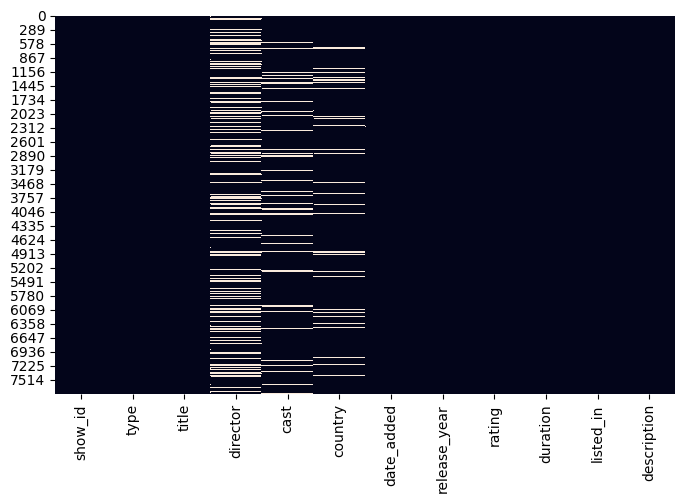

In [14]:
#Visualizing the missing values in the dataset
sns.heatmap(df.isnull(), cbar=False)

Observation: In the dataset, there are missing values for some features. The feature with the highest number of missing values is "director" with 2389, followed by "cast" with 718 and "country" with 507 missing values.

In [15]:
#Handling Nan values
df['country'].fillna(value=df['country'].mode()[0],inplace=True)
df['cast'].fillna(value='No cast',inplace=True)

Observation: 
* We can fill country feature with highest frequency of country occured in the column.
* We cannot impute the cast for any particular film so we assign 'No cast' for that observation.

In [16]:
#'date_added' and 'rating' contains small number of null values so we will drop those particular observations
df.dropna(subset=['date_added','rating'], inplace=True)

In [17]:
#Checking the count of missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2376
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

Observation: Not dropping the director column for now, as we can extract insights from it.

##Exploratory Data Analysis
Exploratory Data Analysis (EDA) is the process of examining and summarizing a dataset's main characteristics, often through visual methods. When performing EDA on a dataset, it is often useful to classify features as either categorical or continuous.

####Illustration-1

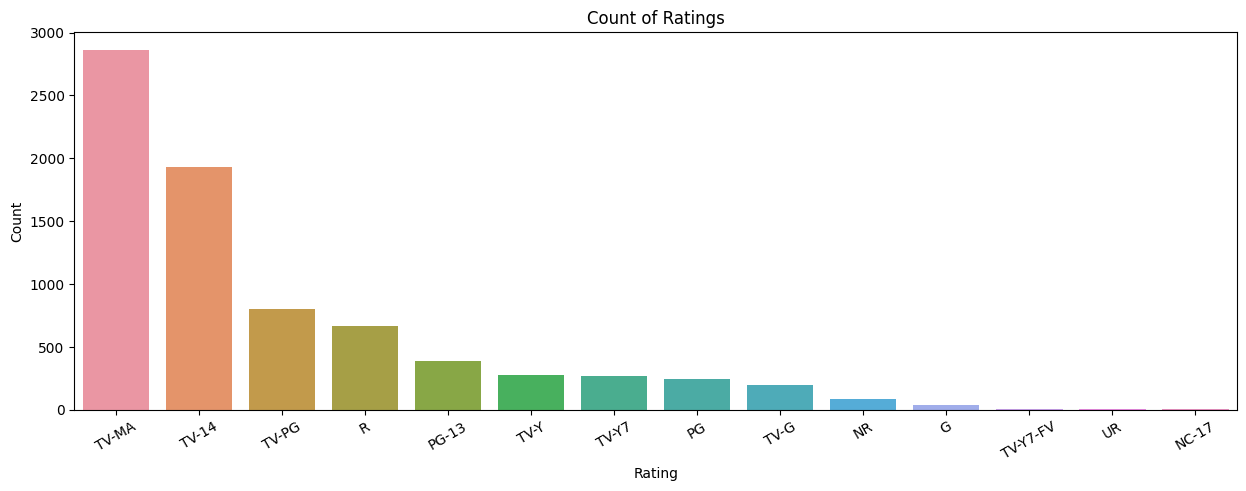

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['rating'].value_counts().index, y=df['rating'].value_counts().values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings')
plt.xticks(rotation=30)
plt.show()

Observation: 
* TV-MA is the highest rated series with 2861, which means it is intended for mature audiences only and contains content that may not be suitable for children.
* TV-14 follows with 1928, meaning it contains content that may not be appropriate for children under 14 years old.
* TV-PG is the third highest rated series with 804, which means it may contain some content that parents may find inappropriate for younger children.
* R rated series come in fourth place with 665, which means it contains strong graphic violence, sexual content, and/or adult language.
* PG-13 rated series are fifth with 386, meaning it may contain material that parents may find inappropriate for children under 13 years old.

####Illustration-2

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

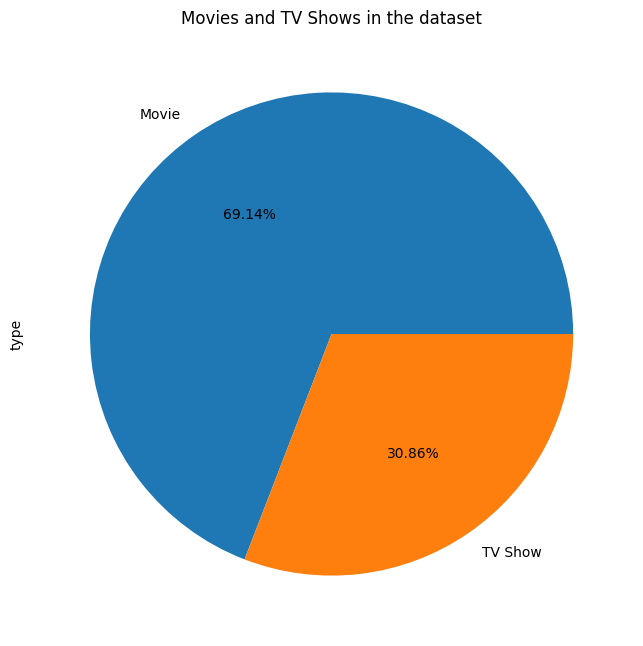

In [19]:
# Percentage of Movies and TV Shows in the dataset
plt.figure(figsize=(8,8))
df['type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Movies and TV Shows in the dataset')

Observation: Netflix has a greater number of movies than TV shows, with 69.14% movies and 30.86% TV shows.

####Illustration-3

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

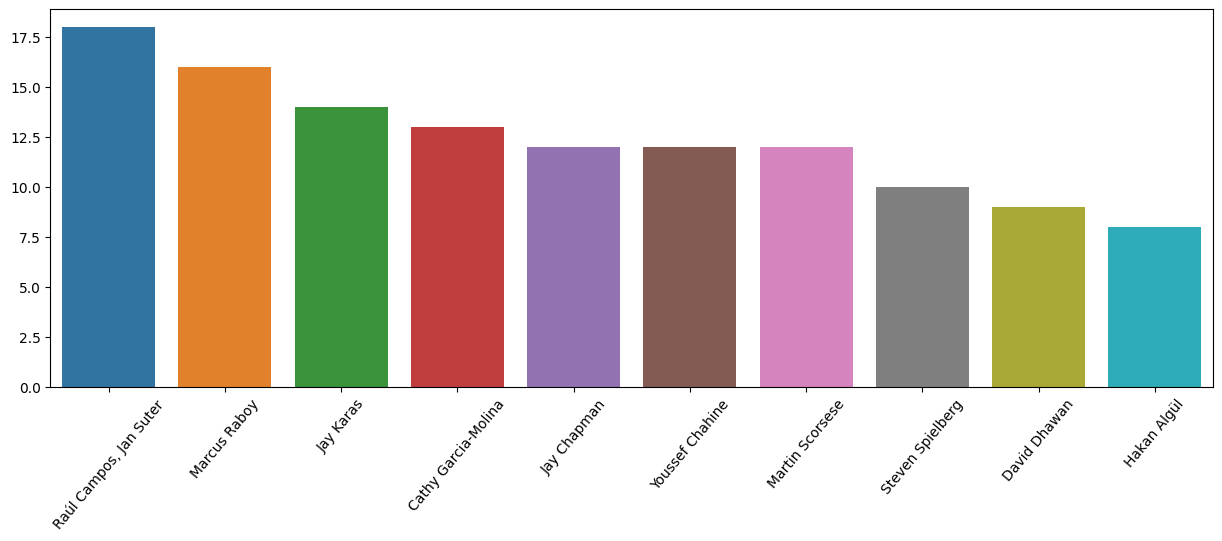

In [20]:
# Top directors w.r.t to films directed
plt.figure(figsize=(15,5))
sns.barplot(x=df['director'].value_counts()[:10].index, y=df['director'].value_counts()[:10].values)
plt.xticks(rotation=50)

Observation: Raúl Campos and Jan Suter have directed the highest number of films i.e. 18 films. Marcus Raboy is close behind with 16 films. Jay Karas and Cathy Garcia-Molina have directed 14 and 13 films respectively.

####Illustration-4

Text(0.5, 1.0, 'Top 10 countries with most contents')

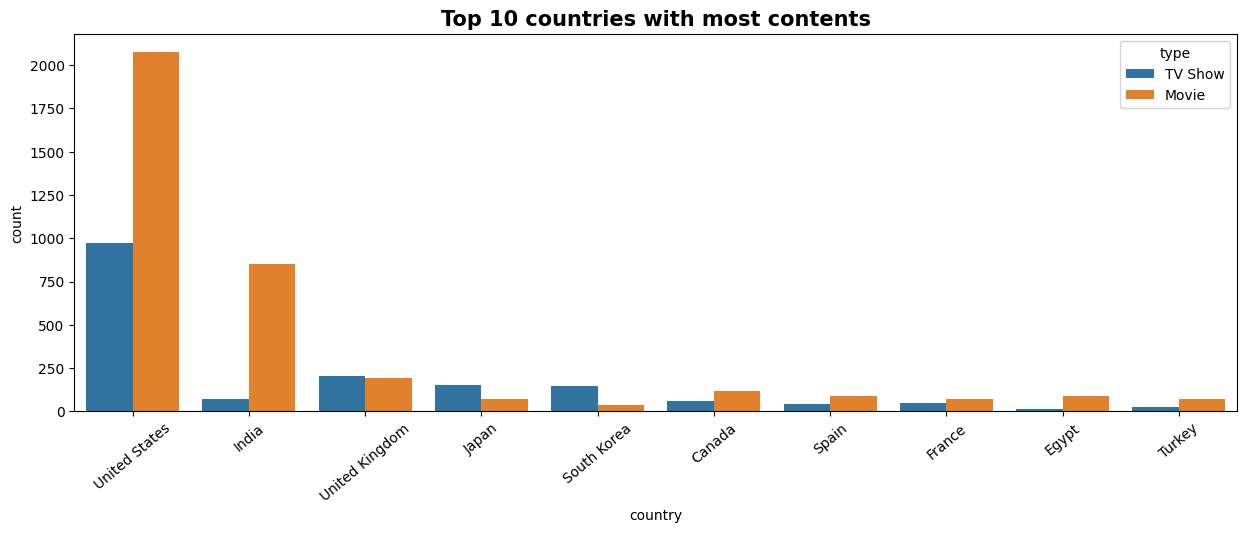

In [21]:
#Bivariate analyses on top 10 countries w.r.t type
plt.figure(figsize=(15,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:10],hue=df['type'])
plt.xticks(rotation=40)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')

Observation: USA has highest number of Films and TV-shows, but in India Films are made on a large scale as compared to TV-shows followed by UK, Japan, South Korea and so on.

####Illustration-5

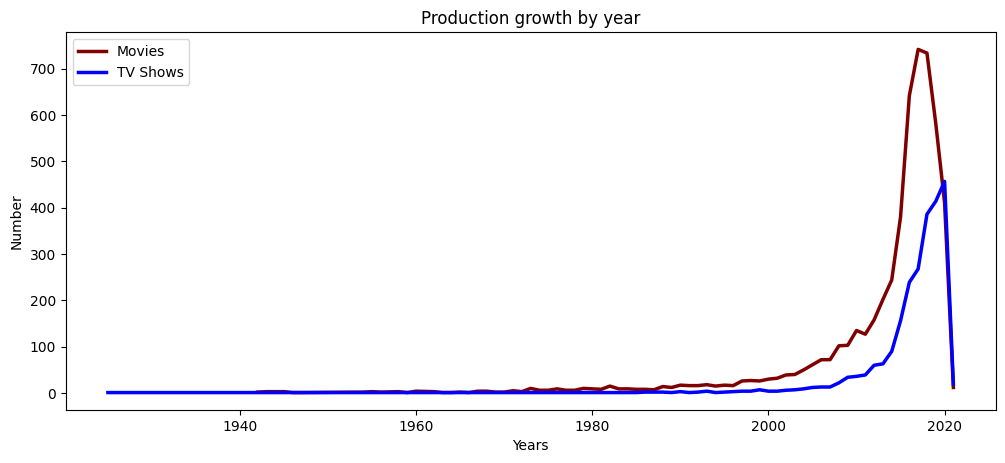

In [22]:
#Analysing Movies and TV Shows by year  
plt.figure(figsize=(12,5))      
moviesByYear = df[df['type']=='Movie']['release_year'].value_counts().sort_index(ascending=False)
tvShowsByYear = df[df['type']=='TV Show']['release_year'].value_counts().sort_index(ascending=False)
moviesByYear.plot(linewidth=2.5, color='maroon',label="Movies")
tvShowsByYear.plot(linewidth=2.5, color='blue',label="TV Shows")
plt.xlabel("Years")
plt.ylabel("Number")
plt.title("Production growth by year");
plt.legend()

Observation: Production of movies started mainly started from 2000's and TV shows were mainly produced from the year 2008.

####Illustration-6

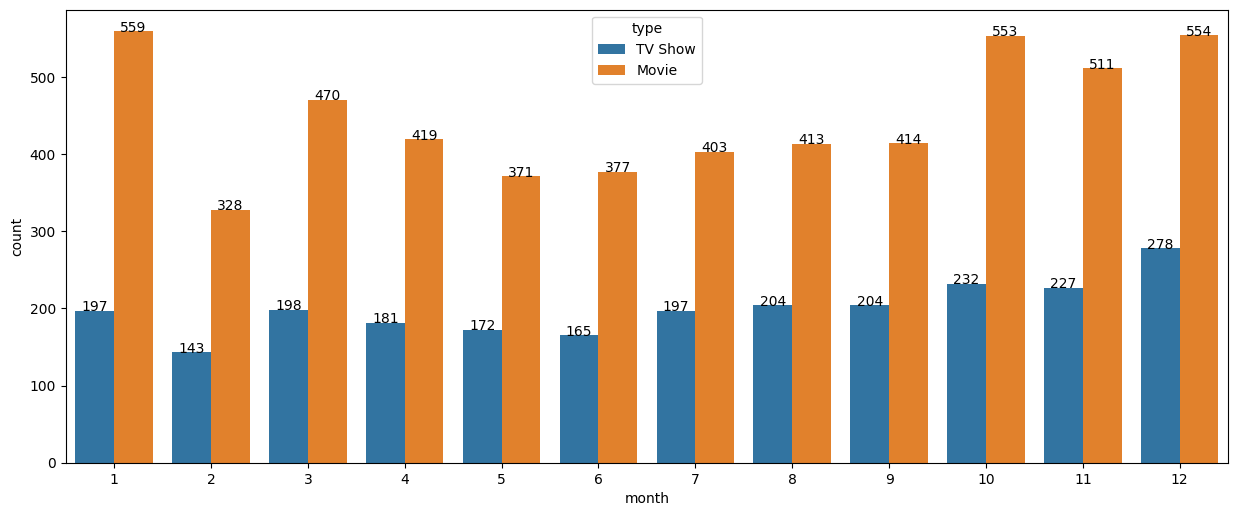

In [23]:
#Bivariate analyses on Movies and TV Shows by month 
plt.figure(figsize=(15,6))
df['month'] = pd.DatetimeIndex(df['date_added']).month
p = sns.countplot(x='month', hue='type', data=df)
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()+5), ha = 'center', va = 'center')

Observation: Here we can derive an analysis that content is mainly released from October to January.

####Illustration-7

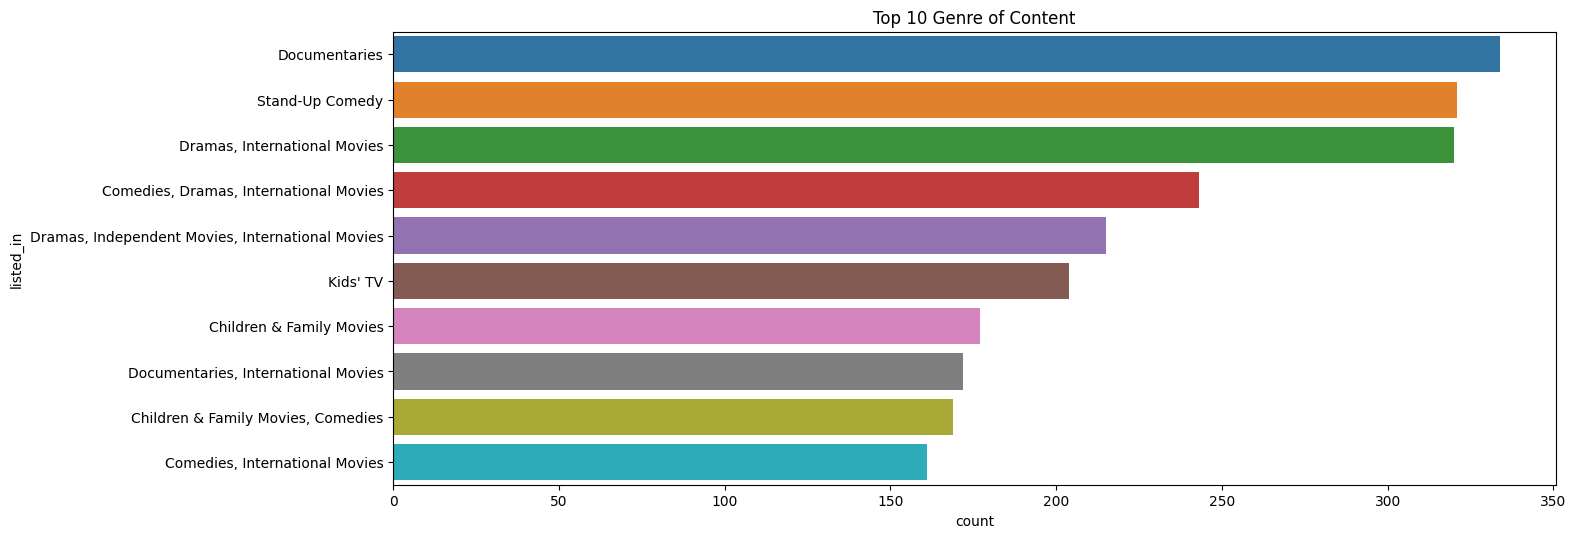

In [24]:
#Analysing top 10 genre of the content created
plt.figure(figsize=(15,6))
plt.title('Top 10 Genre of Content')
sns.countplot(y=df['listed_in'], order=df['listed_in'].value_counts().index[0:10])

Observation: Documentries, Stand-Up Comedy and Drama Movies and TV Shows are leading genres created in shows business. Genres like Kid's TV, Children & Family Movies are also created on large scale.

####Illustration-8

Text(0.5, 1.0, 'Distribution plot for Movies')

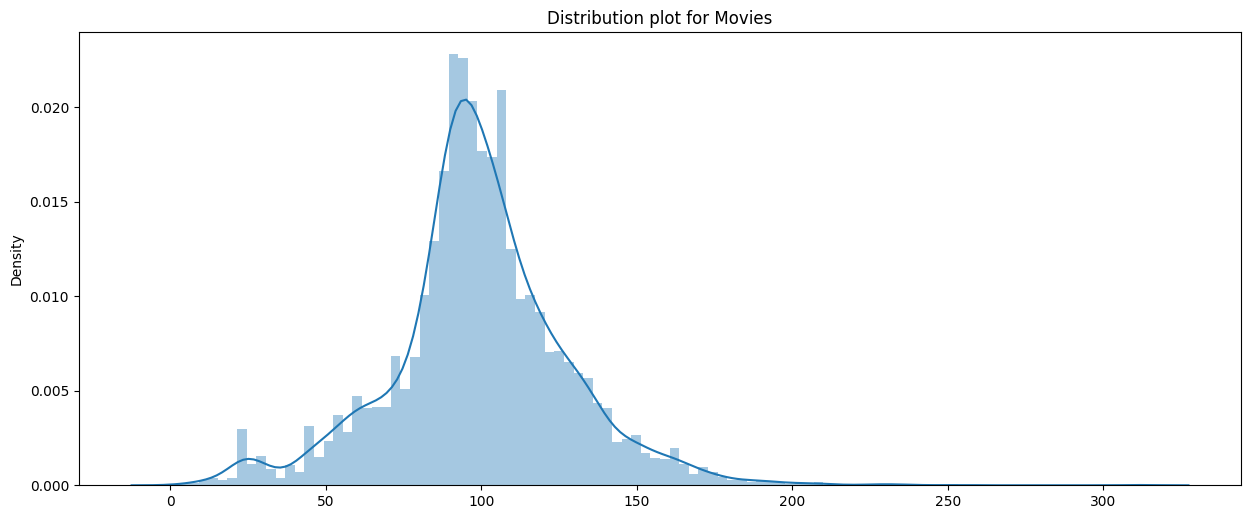

In [25]:
#Visualizing Movies time duration 
plt.figure(figsize=(15,6))
sns.distplot(df[df['type']=='Movie']['duration'].str.extract('(\d+)'), bins=100)
plt.title('Distribution plot for Movies')

Observation: Movies time duration approximately makes a Normal Distribution. We can conclude that time duration of movies mostly range from 70 mins to 130 mins.

####Illustration-9

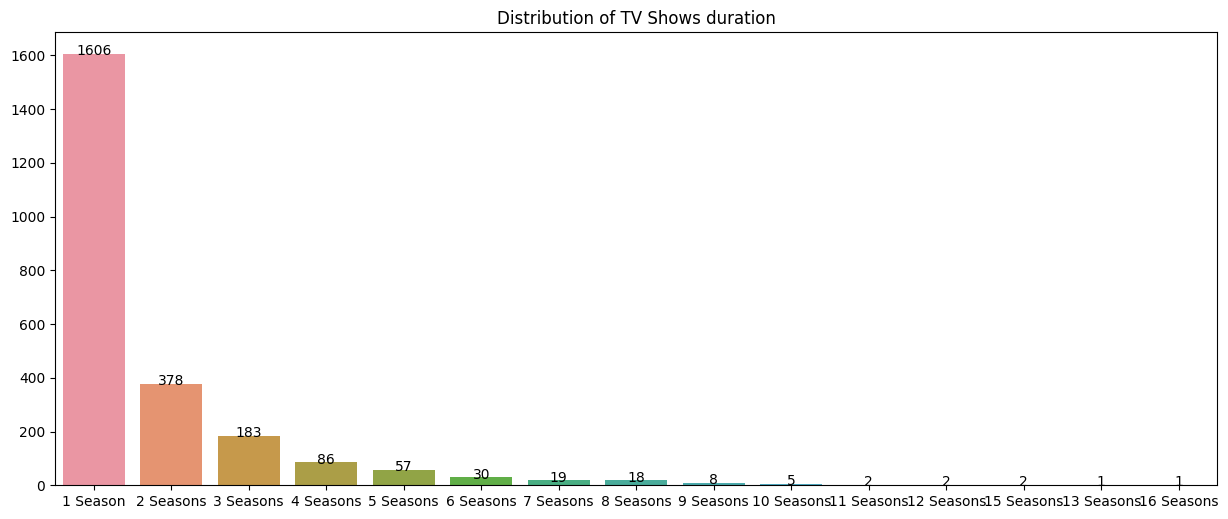

In [26]:
#Visualizing TV Shows released seasons 
plt.figure(figsize=(15,6))
plt.title("Distribution of TV Shows duration")
p = sns.barplot(x = df[df['type']=='TV Show']['duration'].value_counts().index, y = df[df['type']=='TV Show']['duration'].value_counts().values)
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()+10), ha = 'center', va = 'center')

Observation: Here we can conclude that most of the TV Shows launch their 1st Season and if that is hit only then next seasons are planned and created. Therefore we can see there are almost 1600 1st Season count and only 390 2nd Season.   

####Illustration-10

In [27]:
#converting cast feature into a cast list
df['cast'] = df['cast'].apply(lambda x: x.split(','))

In [28]:
#writing a function to make a dictionary of actors and the count of movies or Tv shows they have appeared in.
def actor_count(df):
    from collections import defaultdict
    actor_dict = defaultdict(int)

    for actors in df['cast']:
        for actor in actors:
            actor_dict[actor.strip()] += 1

    return actor_dict

#Calling the function
actor_counts = actor_count(df)

In [29]:
#Sorting the tuples in the dictionary
top_20_actors = sorted(actor_counts.items(), key=lambda x: x[1], reverse=True)[1:20]
#Converting the tuple list into a dict
actor_dict = {actor: count for actor, count in top_20_actors}
#Creating a dataframe of the dict
topActors = pd.DataFrame({'Actor': list(actor_dict.keys()), 'Number of Films': list(actor_dict.values())})

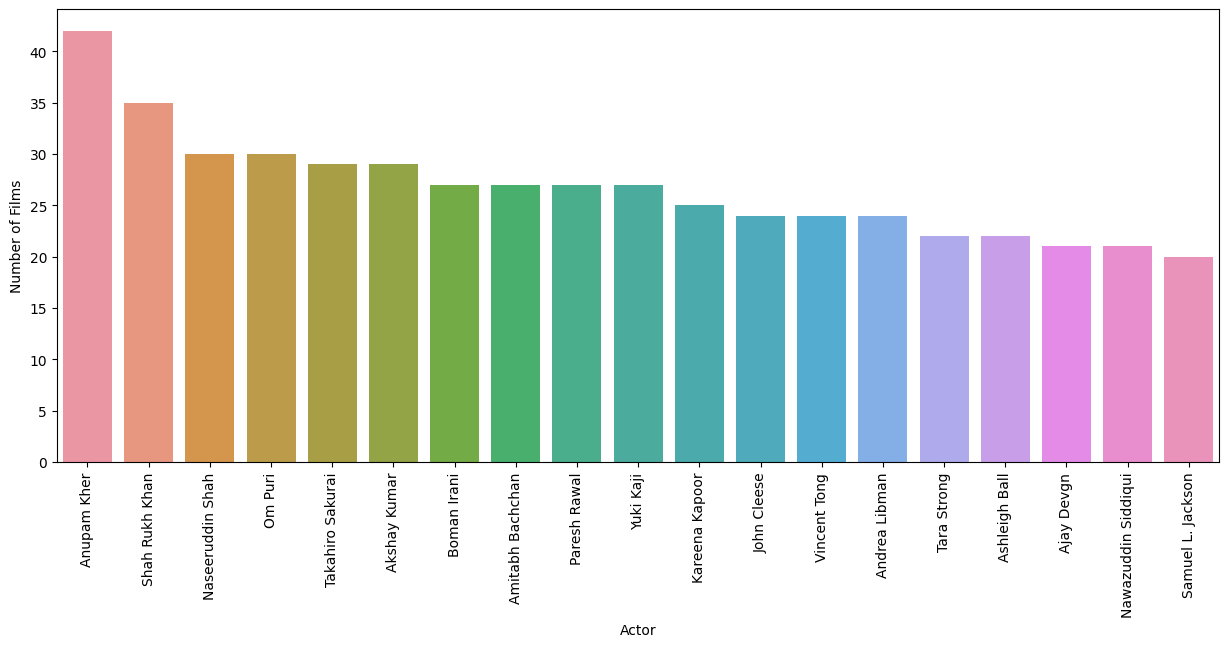

In [30]:
#plotting the topActors dataframe as a barchart
plt.figure(figsize=(15,6))
sns.barplot(x='Actor', y='Number of Films', data=topActors)
plt.xticks(rotation=90)
plt.show()

Observation: According to the data, Anupam Kher has done the highest number of films with 42. Shah Rukh Khan and Naseeruddin Shah follow closely behind with 35 and 30 films respectively. Om Puri has also done 30 films. These actors have established themselves as prominent figures in the film industry with a significant body of work.

####Illustration-11

In [31]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [32]:
#Adding a count column as 1 so as to group the countries and get a total count for the corresponding country 
df['count'] = 1
#Getting the top 10 countries by count
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
#Filtering the original dataframe based on the values of the "country" column.
df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['rating'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
rating,,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.016949,0.000000,0.008696,0.004334,0.013393,0.01,0.000000,0.007463,0.017677,0.075385
Young Adults,0.129944,0.683168,0.156522,0.563380,0.339286,0.13,0.382514,0.089552,0.171717,0.167814


Note: 'pd.crosstab' is a Pandas function used to create a cross-tabulation table from two or more categorical variables. It is used to calculate the number of observations for each combination of categories in the variables. It returns a DataFrame that displays the results of the cross-tabulation in a tabular format.

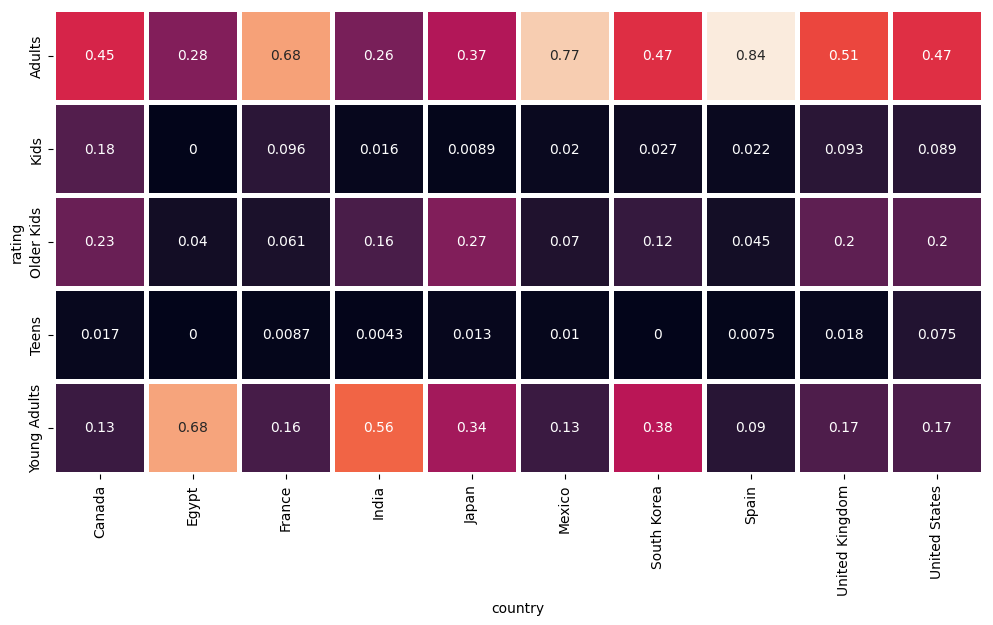

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
#Getting list of top contries by crosstab matrix
country_order = df_heatmap.columns.tolist()
#Getting list of age order by crosstab matrix
age_order = df_heatmap.index.tolist()
# Plotting the heatmap
sns.heatmap(df_heatmap.loc[age_order,country_order],square=True, linewidth=2.5,cbar=False,
            annot=True)

Observation:  The top 5 highest percentage values represent the most dominant rating category in each country. For example, in Spain the highest percentage is 83.58% for Adults rating, followed by 8.36% for Older Kids, 8.96% for Young Adults, 7.46% for Teens and 2.24% for Kids.

####Illustration-12

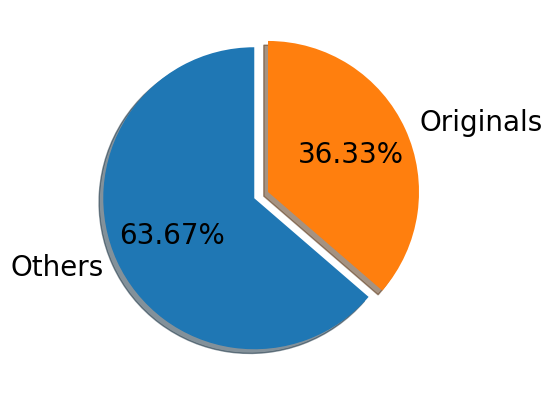

In [34]:
#Creating the year column
df['year'] = pd.DatetimeIndex(df['date_added']).year
#Comparing 'release_year' and 'year' columns and assigning Yes / No as a value
df['originals'] = np.where(df['release_year'] == df['year'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
ax.pie(df['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90, textprops={'color':"black", 'fontsize': 20})
plt.show()

Observation:  36.33 % of content is Netflix original and 63.67 % is produced and released by different modes.

##Data Pre-Processing

In [35]:
# Filling null values with blank spaces
df.fillna('',inplace=True)

In [36]:
#Combining all attributes for better clustering
df['cast'] = df['cast'].apply(lambda x: ' '.join(x))
df['clustering'] = (df['director'] + ' ' + df['cast'] +' ' + df['country'] +' ' + df['listed_in'] +' ' + df['description'])

In [37]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,count,year,originals,clustering
0,s1,TV Show,3%,,João Miguel Bianca Comparato Michel Gomes R...,Brazil,2020-08-14,2020,Adults,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,1,2020,Yes,João Miguel Bianca Comparato Michel Gomes ...
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir Héctor Bonilla Oscar Serrano ...,Mexico,2016-12-23,2016,Adults,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,1,2016,Yes,Jorge Michel Grau Demián Bichir Héctor Bonill...
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan Stella Chung Henley Hii Lawrence ...,Singapore,2018-12-20,2011,Adults,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,1,2018,No,Gilbert Chan Tedd Chan Stella Chung Henley H...
3,s4,Movie,9,Shane Acker,Elijah Wood John C. Reilly Jennifer Connelly...,United States,2017-11-16,2009,Teens,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,1,2017,No,Shane Acker Elijah Wood John C. Reilly Jenni...
4,s5,Movie,21,Robert Luketic,Jim Sturgess Kevin Spacey Kate Bosworth Aar...,United States,2020-01-01,2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,No,Robert Luketic Jim Sturgess Kevin Spacey Kat...


In [38]:
df['clustering'][1]

'Jorge Michel Grau Demián Bichir  Héctor Bonilla  Oscar Serrano  Azalia Ortiz  Octavio Michel  Carmen Beato Mexico Dramas, International Movies After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

###Removing StopWords

In [39]:
STOPWORDS = stopwords.words('english')
stopwords = set(STOPWORDS) 
np.array(stopwords)

array({'ma', 'won', 'more', 'being', 'here', 'couldn', 'nor', 'wasn', 'few', 'have', 'll', 'y', 'until', 'to', "weren't", 'my', 'yourself', "hadn't", 'shan', 'does', 'again', 'under', 'or', "wouldn't", 'ours', "wasn't", 'if', 'both', 't', 'aren', 'in', 'hasn', 'not', 'no', 'i', 'been', "couldn't", 'which', 'very', 'above', 'doing', 'of', 'doesn', "haven't", 'while', "doesn't", 'and', 'each', 'weren', 'your', 'himself', 'against', "won't", 'their', 'than', 'you', 'same', "mustn't", 'then', 'only', 'itself', 'for', 'before', 'between', 'why', 'is', 'below', 'hadn', "you're", 'its', 'them', 'on', "don't", 'there', 'after', "you'd", 'they', 'has', 'how', 'all', 'themselves', 'me', 'ourselves', 'whom', 'd', 'once', "you'll", 'she', 's', 'at', 'didn', 'that', 'as', 'some', 'wouldn', 'too', 'the', "that'll", 'those', 'don', "didn't", "needn't", 'out', "she's", 'about', 'yourselves', 'it', 'when', "should've", 'a', "shan't", 'm', 'having', 'just', 'do', 'off', 'these', "shouldn't", 'hers', 'we

In [40]:
# function to remove stop words
def remove_stopwords(text):
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stopwords]
    # joining the list of words with space separator
    return " ".join(text)

In [41]:
# Removing stop words
df['clustering'] = df['clustering'].apply(remove_stopwords)

In [42]:
df['clustering'][1]

'jorge michel grau demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato mexico dramas, international movies devastating earthquake hits mexico city, trapped survivors walks life wait rescued trying desperately stay alive.'

###Removing Punctuations

In [43]:
# Define a string with all punctuation characters
punctuations = string.punctuation

In [44]:
# function to remove punctuations
def remove_punctuation(text):
  # Remove punctuation characters using the translate() method
  text = text.translate(str.maketrans("", "", punctuations))
  return text

In [45]:
# Removing punctuations
df['clustering'] = df['clustering'].apply(remove_punctuation)

In [46]:
df['clustering'][1]

'jorge michel grau demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato mexico dramas international movies devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive'

###Removing Non-ASCII characters

In [47]:
# Function to remove non-ascii characters
def remove_non_ascii(text):
    return ''.join(c for c in text if ord(c) < 128)

In [48]:
# Removing non-ascii characters
df['clustering'] = df['clustering'].apply(remove_non_ascii)

In [49]:
df['clustering'][1]

'jorge michel grau demin bichir hctor bonilla oscar serrano azalia ortiz octavio michel carmen beato mexico dramas international movies devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive'

###Lemmatization

Lemmatization is the process of reducing a word to its base or root form. Lemmatization takes into account the context and part of speech of the word, and uses a dictionary or a morphological analyzer to find the base form of the word.

In [50]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [51]:
# Lemmatizing the clustering column
df['clustering'] = lemmatize_verbs(df['clustering'])

In [52]:
df['clustering'][1]

'jorge michel grau demin bichir hctor bonilla oscar serrano azalia ortiz octavio michel carmen beato mexico dramas international movies devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive'

###TF - IDF Vectorization

In [53]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 20000)
# Use the fit_transform method to transform the clustering column into a TF-IDF representation
tfidf_matrix = vectorizer.fit_transform(df['clustering'])

In [54]:
tfidf_matrix.shape

(7770, 20000)

In [55]:
X = tfidf_matrix.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

####Note:
TfidfVectorizer is used to convert a collection of raw text documents to a matrix of TF-IDF features. The goal of using TF-IDF instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.


###Dimensionality Reduction using PCA

In [56]:
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)

PCA(random_state=40)

Text(0, 0.5, 'cumulative explained variance')

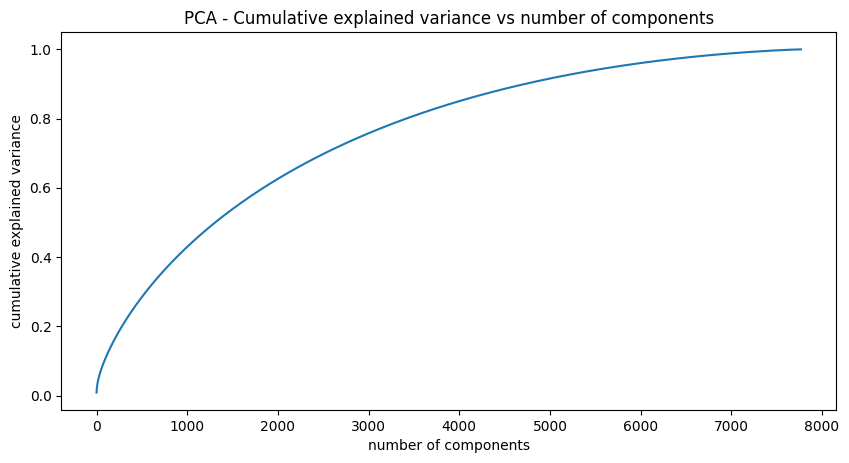

In [57]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [58]:
# Calculate the cumulative sum of explained variances
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
# Determine the number of components needed to explain at least 80% of the variance
n_components = np.argmax(cumulative_sum >= 0.8) + 1
# Re-initialize the PCA instance with the determined number of components
pca = PCA(n_components=n_components,random_state=40)
# Fit the PCA model to the data
pca.fit(X)
# Transform the data using the fitted PCA model
X_reduced = pca.transform(X)

In [27]:
# shape of transformed vectors
print(X_reduced.shape)
X_reduced

(7770, 3416)


array([[ 0.12369184, -0.02691462,  0.01273811, ...,  0.02408579,
        -0.00567622,  0.01938733],
       [-0.03922866, -0.03470339, -0.00537205, ..., -0.0133569 ,
        -0.00895418, -0.00057415],
       [-0.04338342, -0.04373907,  0.01810791, ...,  0.00209877,
         0.00439256,  0.00212035],
       ...,
       [-0.05711667,  0.04924655, -0.09228556, ..., -0.00302632,
        -0.004705  ,  0.00858663],
       [ 0.0992782 , -0.00363888, -0.00807566, ...,  0.00513857,
        -0.01130518,  0.01910864],
       [-0.06049774,  0.18524631, -0.20677635, ..., -0.0026383 ,
        -0.00133621,  0.00115214]])

Observation: Here we calculate the cumulative sum of explained variances and determine the number of components needed to explain at least 80% of the variance in the data. Finally, we re-initialize the PCA instance with the determined number of components and fit the model to the data again to obtain the reduced representation of the data

In [60]:
#Saving the trained transformed vectors on the drive
pickle.dump(X_reduced, open("/content/drive/MyDrive/Netflix Movies And TV Shows Clustering/transformedMatrix.pkl", "wb"))

In [24]:
with open("/content/drive/MyDrive/Netflix Movies And TV Shows Clustering/transformedMatrix.pkl", "rb") as f:
    X_reduced = pickle.load(f)

In [25]:
X_reduced.shape

(7770, 3416)

##Unsupervised ML Clustering
Unsupervised Machine Learning is a type of machine learning where the model is trained on unlabeled data.

Unsupervised learning algorithms are used for tasks such as clustering, dimensionality reduction, and anomaly detection. In clustering, the goal is to group similar data points into clusters.

###K-Means Clustering
K-Means Clustering is a type of unsupervised learning in machine learning, used for cluster analysis. It partitions data into K number of clusters, where each data point belongs to the cluster with the nearest mean. The algorithm iteratively updates the mean values and the cluster assignments, until the cluster means no longer change or a maximum number of iterations is reached.

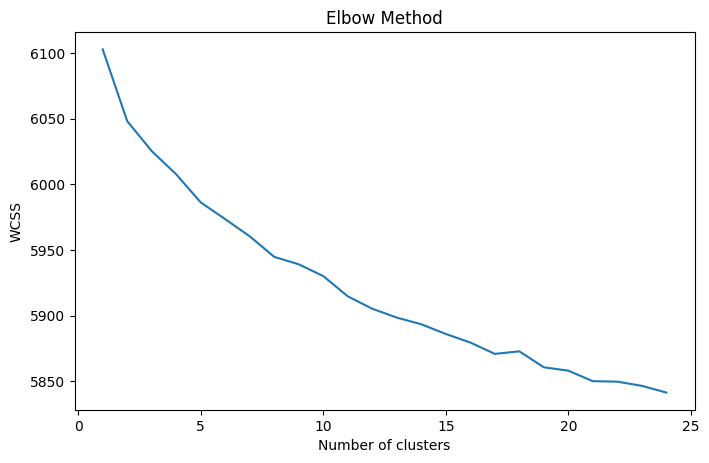

In [63]:
# Initialize an empty list to store the Within-Cluster-Sum-of-Squared (WCSS) values
wcss = []

# Loop over a range of possible number of clusters
for i in range(1, 25):
    # Initialize a KMeans instance with the specified number of clusters, using the k-means++ initialization method
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Fit the k-means model to the data
    kmeans.fit(X_reduced)
    # Append the WCSS value for this number of clusters to the list of WCSS values
    wcss.append(kmeans.inertia_)

# Plot the WCSS values as a function of the number of clusters
plt.plot(range(1, 25), wcss)
# Add a title, x-axis label, and y-axis label to the plot
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Display the plot
plt.show()

###Note:
Because of high degree of dimensionality in the dataset we can see no relevant elbow point being created in the above graph so we have to consider the silhouette score in this case so as to find a relevant number of clusters.

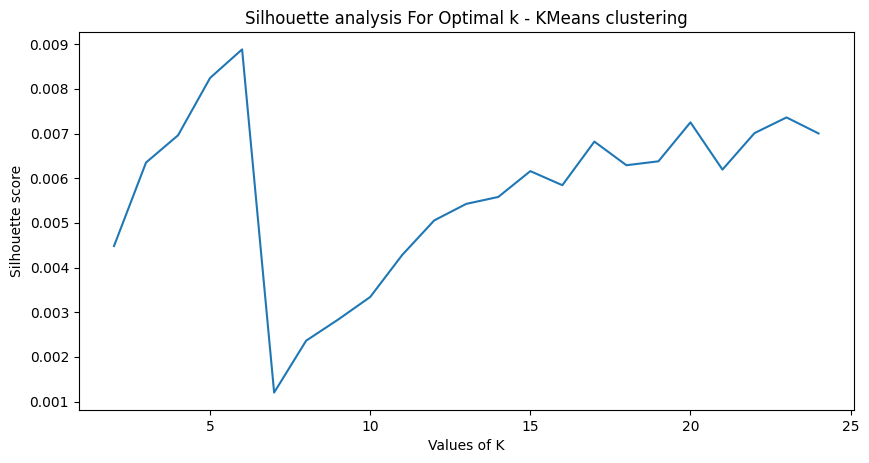

In [64]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,25)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initializing kmeans algo
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=0)
  kmeans.fit(X_reduced)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(X_reduced, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

Observation: Here through Silhouette scores for n number of clusters we can conclude that cluster no 6 has highest silhouette score so we will be feeding 6 as the number of cluster for Agglomerative Hierarchical Clustering.

###Dendogram:
Dendrograms are commonly used in hierarchical clustering to represent the relationships between data points and the clusters they belong to.The dendrogram displays the hierarchy of clusters by showing the relationships between merged clusters and the distances between them.

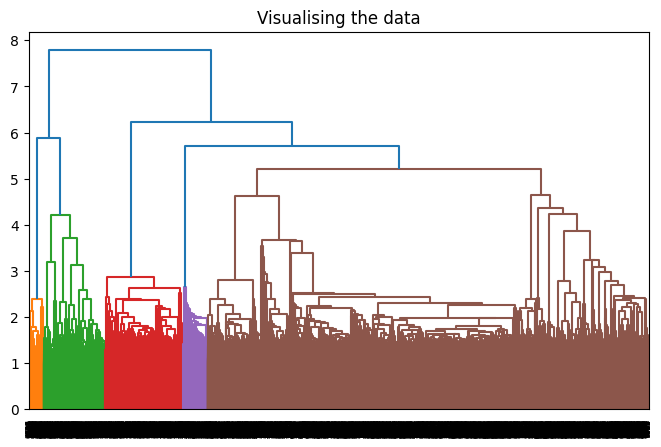

In [65]:
plt.figure(figsize=(10,5))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_reduced, method ='ward')))

###Agglomerative Hierarchical Clustering
In this analysis the dendrogram is constructed by starting with each data point as a separate cluster and iteratively merging the closest clusters until all data points belong to a single cluster.

In [66]:
#Fitting our variable in Agglomerative Clusters
agg_clustering = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
agg_clustering.fit(X_reduced)
#Predicting using our model
y_hc=agg_clustering.fit_predict(X_reduced)

In [67]:
#creating a column where each row is assigned to their separate cluster
df['cluster'] = agg_clustering.labels_

In [68]:
#Saving final comparison_df to drive
df.to_csv('/content/drive/MyDrive/Netflix Movies And TV Shows Clustering/cluster_df.csv')

In [18]:
df = pd.read_csv('/content/drive/MyDrive/Netflix Movies And TV Shows Clustering/cluster_df.csv', index_col=[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,count,year,originals,clustering,cluster
0,s1,TV Show,3%,NaN,João Miguel Bianca Comparato Michel Gomes R...,Brazil,2020-08-14,2020,Adults,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,1,2020,Yes,joo miguel bianca comparato michel gomes rodol...,0
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir Héctor Bonilla Oscar Serrano ...,Mexico,2016-12-23,2016,Adults,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,1,2016,Yes,jorge michel grau demin bichir hctor bonilla o...,0
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan Stella Chung Henley Hii Lawrence ...,Singapore,2018-12-20,2011,Adults,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,1,2018,No,gilbert chan tedd chan stella chung henley hii...,0
3,s4,Movie,9,Shane Acker,Elijah Wood John C. Reilly Jennifer Connelly...,United States,2017-11-16,2009,Teens,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,1,2017,No,shane acker elijah wood john c reilly jennifer...,2
4,s5,Movie,21,Robert Luketic,Jim Sturgess Kevin Spacey Kate Bosworth Aar...,United States,2020-01-01,2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,No,robert luketic jim sturgess kevin spacey kate ...,2


###Model Visualization and Evaluation

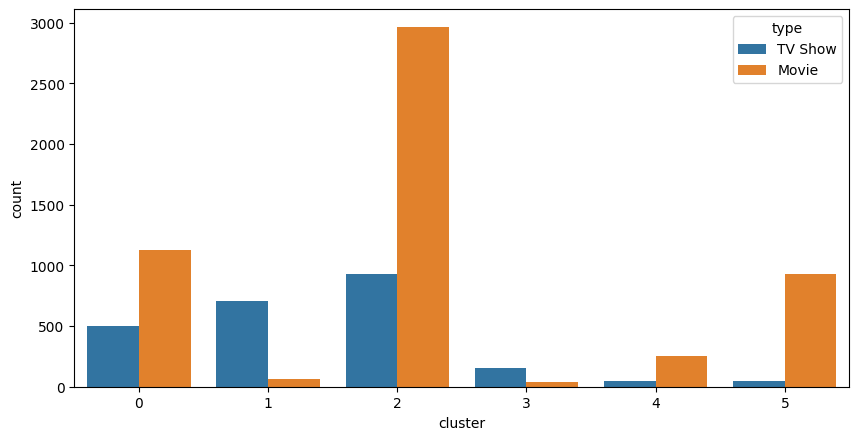

In [19]:
#Plotting the cluster count w.r.t type
plt.figure(figsize=(10,5))
sns.countplot(x='cluster', data=df, hue='type')

Observation: Here we can see the clusters formed and visualize the type of content in each particular cluster.

###Content based Recommender System
A content-based recommender system for movies might recommend movies to users based on the actors, directors, genres, and keywords of the movies they have watched. If a user has watched several action movies featuring Tom Cruise, the system might recommend other action movies that star Tom Cruise or similar actors.

In [20]:
# Create the feature matrix using TfidfVectorizer
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(df['clustering'])
# Compute cosine similarity
cosine_sim = cosine_similarity(feature_matrix)

In [21]:
# Create the recommender system
indices = pd.Series(df.index, index=df['title'])

#Function to compare the cosine similarity and rank them
def recommend_items(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    item_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[item_indices]

In [22]:
# Recommend items for a specific title
print(recommend_items('Blood Pact'))

2137    Fear Files... Har Mod Pe Darr
1622             Darr Sabko Lagta Hai
2461                           Goedam
1049                      Borderliner
534       Anjaan: Special Crimes Unit
1616                      Dark Matter
765                            Battle
5441                           Scream
3033                   Into the Night
1250                             Cave
Name: title, dtype: object


In [23]:
print(recommend_items('Zindagi Kitni Haseen Hay'))

5873              Sugar Rush
5874    Sugar Rush Christmas
4387       Nailed It! France
2193         Fit for Fashion
3004              Ink Master
4059           Mexico Diseña
6224       The Circle France
7148       Too Hot to Handle
6223       The Circle Brazil
5648               Skin Wars
Name: title, dtype: object


Observation: As we can see we gave a specific title i.e. 'Blood Pact' to the recommender system and it gave us the top 10 ranking cosine similar movie titles and their indices in the dataset.

We can confirm that the movies recommended are from a horror genre as we gave a horror movie title to the system. Hence we can conclude that our recommender system is giving us relevant results.

##Conclusion and Recommendations
**Conclusion**

Clustering is a technique used in machine learning and data analysis to group similar data points together based on their characteristics. This technique can be applied to Netflix's movies and TV shows to categorize them into groups based on their genre, popularity, audience, etc.

This information can be used by Netflix to make recommendations to its users, improve its content offerings, and increase engagement and customer satisfaction

The analysis yielded several key findings, including:
* TV-MA is the highest rated series with 2861, which means it is intended for mature audiences only and contains content that may not be suitable for children.
* Netflix has a greater number of movies than TV shows, with 69.14% movies and 30.86% TV shows.
* Raúl Campos and Jan Suter have directed the highest number of films i.e. 18 films.
* USA has highest number of Films and TV-shows, but in India Films are made on a large scale as compared to TV-shows
* Production of movies started mainly started from 2000's.
* Content is mainly released from October to January as these is the peak holiday season.
* Time duration of movies mostly range from 70 mins to 130 mins.
* Anupam Kher has done the highest number of films with 42. Shah Rukh Khan and Naseeruddin Shah follow closely behind with 35 and 30 films respectively.
* 36.33 % of content is Netflix original and 63.67 % is produced and released by different modes.

